In [34]:
import numpy as np 
import json as json
import glob as glob
import zipfile as zipfile
import json as json
from nltk.tokenize import word_tokenize
import pandas as pd 
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import textblob
from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE
import patsy
import pygal as pygal

In [35]:
pd.set_option('display.max_colwidth', -1)

pd.set_option('display.max_rows', 1000)

In [68]:
category = pd.read_csv('categories_titles.csv',error_bad_lines=False)
clean_votes = pd.read_csv('clean_votes.csv',error_bad_lines=False)

year = pd.read_csv('year.csv',error_bad_lines=False)
# country_code=pd.read_csv('country_codes_final.csv',error_bad_lines=False)

In [69]:
category['category'].value_counts()

Middle East                     782
Nuclear Disarmament             753
Other                           288
Universal Human Rights          238
Decolonization                  183
Racial Discrimination           88 
South Africa                    77 
Funding                         75 
Security                        58 
Law of the sea                  56 
Science and Technology          54 
Arm Race in Space               50 
Namibia                         46 
Peace                           40 
Developing Countries            38 
Lebanon                         37 
Cuba                            32 
Environment                     31 
Iran                            30 
Trade and Commodities           25 
Cooperation                     21 
Yugoslavia                      20 
Mayotte                         17 
Democratization                 16 
Economic Order                  16 
Women                           15 
Iraq                            15 
International Order         

In [70]:
data=pd.merge(category, clean_votes, on=['resolut']);
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543566 entries, 0 to 543565
Data columns (total 8 columns):
resolut     543566 non-null object
descr       543566 non-null object
vote        543566 non-null object
descr1      543566 non-null object
category    543566 non-null object
voted       543566 non-null object
country     543566 non-null object
date        543566 non-null object
dtypes: object(8)
memory usage: 37.3+ MB


In [71]:
data['year'] = data['date'].apply(lambda x: int(x[-5:]))

In [72]:
# df=data[['category','voted']]

# df.head()

In [73]:
# df1=df.groupby(['category']).sum().reset_index()


In [74]:
# df1.head()

In [75]:
# def fun (voted):
#     countA=0
#     countN=0
#     countY=0
#     for i in voted:
#         if i=='A':
#             countA+=1
#         if i=='N':
#             countN+=1
#         if i=='Y':
#             countY+=1
#     return ('A', countA),('N',countN),('Y',countY)

In [44]:
# df1['count']=df1['voted'].apply(fun)

In [76]:
# def count_no (voted):
#     countN=0
#     for i in voted:
#         if i=='N':
#             countN+=1
#     return countN

In [77]:
# df1['no_count']=df1['voted'].apply(count_no)

In [78]:
# def count_yes (voted):
#     countY=0
#     for i in voted:
#         if i=='Y':
#             countY+=1
#     return countY

In [79]:
# df1['yes_count']=df1['voted'].apply(count_yes)

In [80]:
# def count_total(voted):
#     count_total=0
#     for i in voted:
#             count_total+=1
#     return count_total

In [81]:
# df1['total']=df1['voted'].apply(count_total)

In [82]:
# df2=df1[['category','no_count','yes_count','total']]

In [83]:
# df2

In [84]:
import warnings
warnings.filterwarnings("ignore")

df2['%_no']=((df2['no_count'].copy()/df2['total'].copy())*100).round(2)
df2['%_yes']=((df2['yes_count'].copy()/df2['total'].copy())*100).round(2)
df2=df2.sort_values('total', ascending=False)

In [54]:
# df2

In [55]:
data1=data[['category','resolut']]

In [56]:
data2=data1.groupby(['category']).resolut.nunique().to_frame('resolution_count').reset_index()



In [57]:
# data2

In [58]:
df2=df1[['category','no_count','yes_count']]
# df_ap=df2.sort_values('no', ascending=False)

# df_ap.reset_index(drop=True)



In [59]:
data=pd.merge(data2, df2, on=['category']);

In [60]:
data['#_no_per_resolut']=(data['no_count']/data['resolution_count']).round(2)
data['#_yes_per_resolut']=(data['yes_count']/data['resolution_count']).round(2)

In [61]:
# data

In [62]:
df2=df1[df1['category']=='Arm Race in Space']

df2

category  \
5  Arm Race in Space   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [63]:
# data1=data[data['category']!='Other']

In [64]:
# data1['resolut']

In [65]:
# data1['resolut2']=data1['resolut'].apply(lambda x: np.nan_to_num(x))

In [86]:
df=data[['category','year','resolut']]

df['category'].nunique()

63

In [87]:
df1 = df.groupby(['category','year']).resolut.nunique().to_frame('count')

df1.reset_index(inplace=True)
df2=df1.sort_values('count', ascending=False)

df2.reset_index(drop=True);

# df2.head(100)

In [88]:
df_arm=df2[df2['category']=='Nuclear Disarmament']
df_arm_race=pd.merge(year,df_arm , how='left', on='year', left_on=None, right_on=None)
df_arm_race=df_arm_race.apply(lambda x: np.nan_to_num(x))

In [89]:
df_rights=df2[df2['category']=='Universal Human Rights']
df_hum_rights=pd.merge(year,df_rights , how='left', on='year', left_on=None, right_on=None)
df_hum_rights=df_hum_rights.apply(lambda x: np.nan_to_num(x))

In [90]:
df_east=df2[df2['category']=='Middle East']
df_east=pd.merge(year,df_east, how='left', on='year', left_on=None, right_on=None)
df_m_east=df_east.apply(lambda x: np.nan_to_num(x))

In [91]:
df_dec=df2[df2['category']=='Decolonization']
df_dec=pd.merge(year,df_dec, how='left', on='year', left_on=None, right_on=None)
df_decol=df_dec.apply(lambda x: np.nan_to_num(x))

In [92]:
df_disc=df2[df2['category']=='Racial Discrimination']
df_disc_race=pd.merge(year,df_disc, how='left', on='year', left_on=None, right_on=None)
df_disc_race=df_disc_race.apply(lambda x: np.nan_to_num(x))

In [106]:
(df_m_east['count'].tolist())*10

[17,
 24,
 27,
 30,
 26,
 26,
 24,
 26,
 25,
 27,
 25,
 26,
 25,
 19,
 18,
 18,
 20,
 20,
 19,
 19,
 19,
 19,
 20,
 20,
 19,
 17,
 18,
 17,
 17,
 17,
 17,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 24,
 27,
 30,
 26,
 26,
 24,
 26,
 25,
 27,
 25,
 26,
 25,
 19,
 18,
 18,
 20,
 20,
 19,
 19,
 19,
 19,
 20,
 20,
 19,
 17,
 18,
 17,
 17,
 17,
 17,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 24,
 27,
 30,
 26,
 26,
 24,
 26,
 25,
 27,
 25,
 26,
 25,
 19,
 18,
 18,
 20,
 20,
 19,
 19,
 19,
 19,
 20,
 20,
 19,
 17,
 18,
 17,
 17,
 17,
 17,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 24,
 27,
 30,
 26,
 26,
 24,
 26,
 25,
 27,
 25,
 26,
 25,
 19,
 18,
 18,
 20,
 20,
 19,
 19,
 19,
 19,
 20,
 20,
 19,
 17,
 18,
 17,
 17,
 17,
 17,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 24,
 27,
 30,
 26,
 26,
 24,
 26,
 25,
 27,
 25,
 26,
 25,
 19,
 18,
 18,
 20,
 20,
 19,
 19,
 19,
 19,
 20,
 20,
 19,
 17,
 18,
 17,
 17,
 17,
 17,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 24,
 27,
 30,
 26,
 26,
 24,
 26,
 25,
 27,


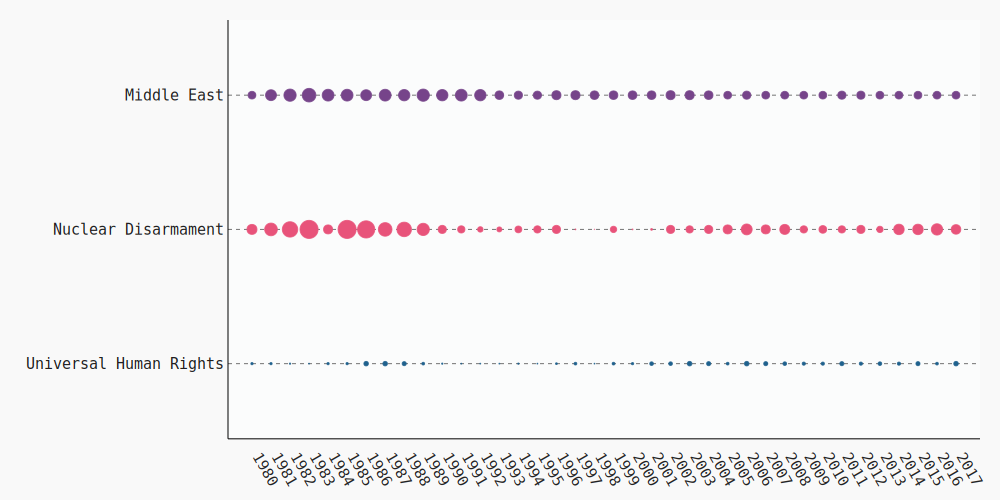

In [127]:
import pygal as pygal
# import cairosvg
from pygal.style import CleanStyle
from pygal.style import Style

custom_style = Style(title_font_size=20,label_font_size=15,\
                     value_label_font_size=20,plot_background ='#FBFCFC ',\
                    colors=('#76448A', '#E8537A', '#1F618D', '#212F3D'))


dot_chart = pygal.Dot(x_label_rotation=60,show_legend=False,explicit_size=110000,width=1000,height=500,style=custom_style)
# dot_chart.title = 'Volume of Resolutions by 5 Major Topics and Year'
dot_chart.x_labels = df_arm_race['year'].tolist()

dot_chart.add('Middle East',[i * 1000 for i in df_m_east['count'].tolist()])
dot_chart.add('Nuclear Disarmament',[i * 1000 for i in df_arm_race['count'].tolist()])
dot_chart.add('Universal Human Rights',[i * 1000 for i in df_hum_rights['count'].tolist()])
# dot_chart.add('Universal Human Rights', df_hum_rights['count'].tolist())
# dot_chart.add('Nuclear Disarmament', df_arm['count'].tolist())
# dot_chart.add('Universal Human Rights', df_hum_rights['count'].tolist())

# dot_chart.add('Decolonization', df_decol['count'].tolist())
# dot_chart.add('Racial Discrimination', df_disc_race['count'].tolist())



# dot_chart.render()


# display({'image/svg': dot_chart.render()}, raw=True)

# dot_chart.render_to_png('/tmp/chart.png')

display({'image/svg+xml': dot_chart.render()}, raw=True)

dot_chart.render_to_png('my_chart.png')

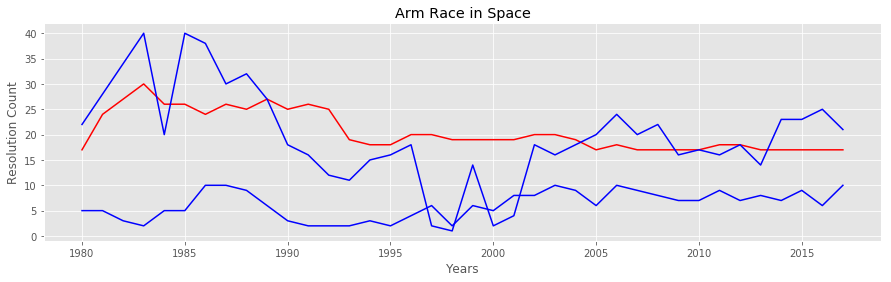

In [131]:
plt.style.use('ggplot')

fig, axes = plt.subplots(figsize=(15,4))


plt.plot(df_m_east['year'], df_m_east['count'], color='red')
plt.plot(df_arm_race['year'], df_arm_race['count'], color='blue')
plt.plot(df_hum_rights['year'], df_hum_rights['count'], color='blue')

plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Arm Race in Space')
plt.show()




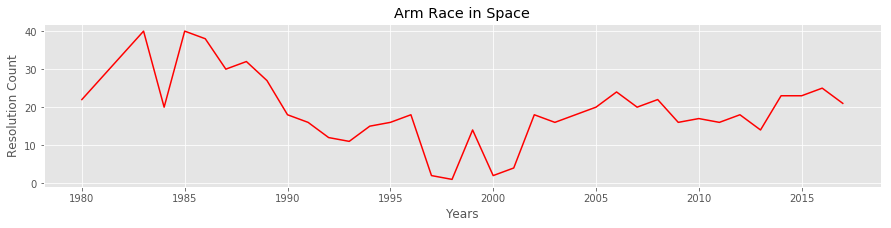

In [119]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_arm_race['year'], df_arm_race['count'], color='red')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Arm Race in Space')
plt.show()

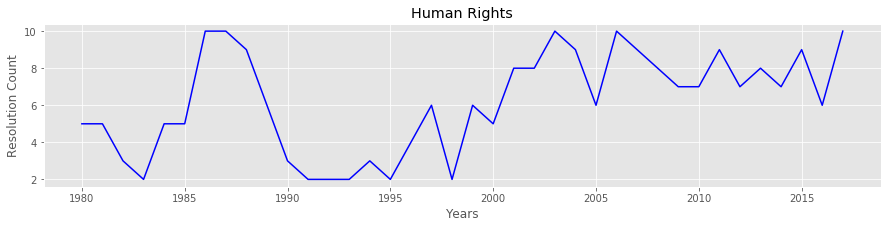

In [237]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_hum_rights['year'], df_hum_rights['count'], color='blue')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Human Rights')
plt.show()

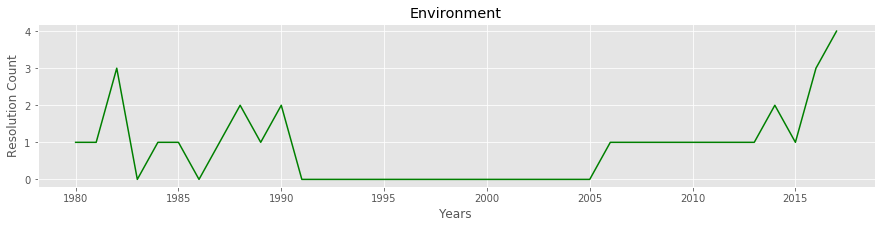

In [238]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_envr['year'], df_envr['count'], color='green')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Environment')
plt.show()

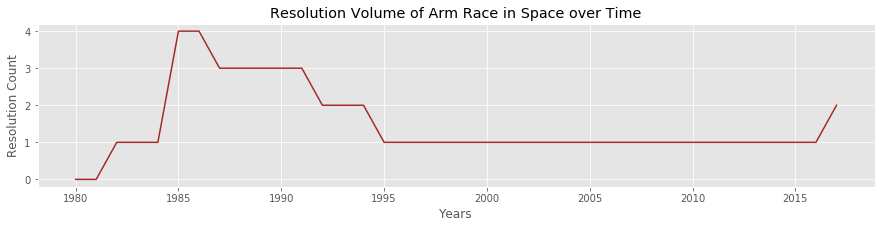

In [239]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_sea_law['year'], df_sea_law['count'], color='brown')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Resolution Volume of Arm Race in Space over Time')
plt.show()

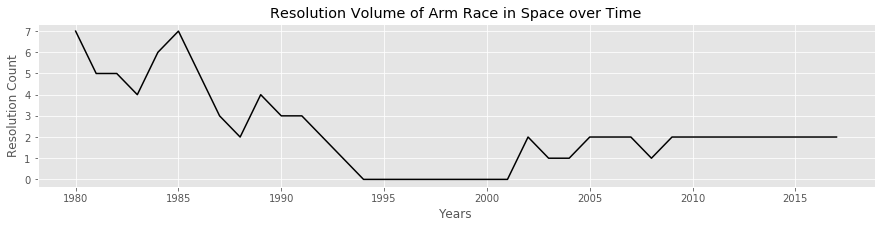

In [240]:
fig, axes=plt.subplots(figsize=(15,3))
plt.style.use('ggplot')
plt.plot(df_disc_race['year'], df_disc_race['count'], color='k')
plt.xlabel('Years')
plt.ylabel('Resolution Count')
plt.title('Resolution Volume of Arm Race in Space over Time')
plt.show()

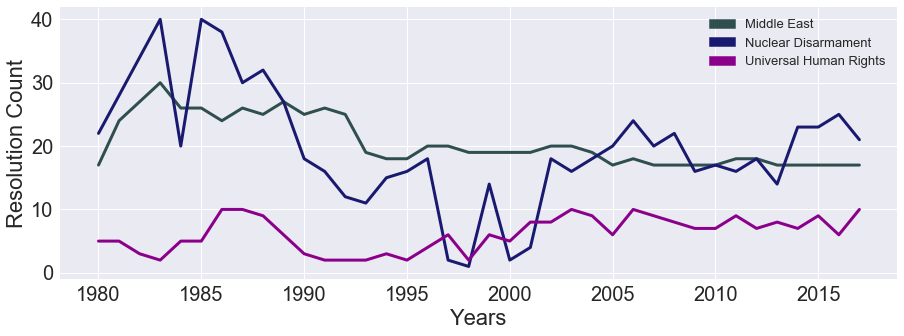

In [144]:
import matplotlib.patches as mpatches

sns.set(font_scale=2)
fig, axes=plt.subplots(figsize=(15,5))
plt.style.use('ggplot')



# plt.plot(df_arm_race['year'], df_arm_race['count'], color='red')
# plt.plot(df_hum_rights['year'], df_hum_rights['count'], color='blue')
# plt.plot(df_envr['year'], df_envr['count'], color='green')
# plt.plot(df_sea_law['year'], df_sea_law['count'], color='brown')
# plt.plot(df_disc_race['year'], df_disc_race['count'], color='k')

plt.plot(df_m_east['year'], df_m_east['count'], color='darkslategrey', linewidth=3)
plt.plot(df_arm_race['year'], df_arm_race['count'], color='midnightblue',linewidth=3)
plt.plot(df_hum_rights['year'], df_hum_rights['count'], color='darkmagenta',linewidth=3)


plt.xlabel('Years')
plt.ylabel('Resolution Count')
# plt.title('Resolution Volume of Arm Race in Space over Time')

east_patch = mpatches.Patch(color='darkslategrey', label='Middle East')
arm_patch = mpatches.Patch(color='midnightblue', label='Nuclear Disarmament')
rights_patch = mpatches.Patch(color='darkmagenta', label='Universal Human Rights')
# sea_law_patch = mpatches.Patch(color='brown', label='Law of the Sea')
# disc_race_patch = mpatches.Patch(color='k', label='Discrimination')
plt.legend(handles=[east_patch,arm_patch,rights_patch],loc='best', fontsize = 13,markerscale=2)

# plt.xlim(min(np.arange(len(df_arm_race['year']))), max(np.arange(len(df_arm_race['year']))))

plt.show()

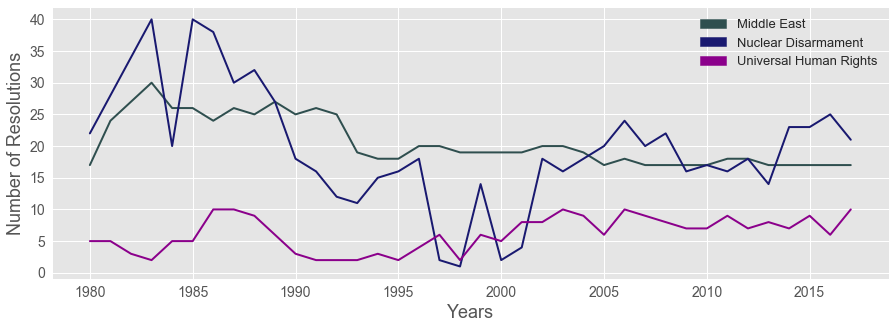

In [150]:
sns.set(font_scale=1.4)
plt.style.use('ggplot')
fig, axes=plt.subplots(figsize=(15,5))
plt.style.use('ggplot')
plt.plot(df_m_east['year'], df_m_east['count'], color='darkslategrey', linewidth=2)
plt.plot(df_arm_race['year'], df_arm_race['count'], color='midnightblue',linewidth=2)
plt.plot(df_hum_rights['year'], df_hum_rights['count'], color='darkmagenta',linewidth=2)
plt.xlabel('Years',size=18)
plt.ylabel('Number of Resolutions', size=18)
east_patch = mpatches.Patch(color='darkslategrey', label='Middle East')
arm_patch = mpatches.Patch(color='midnightblue', label='Nuclear Disarmament')
rights_patch = mpatches.Patch(color='darkmagenta', label='Universal Human Rights')
plt.legend(handles=[east_patch,arm_patch,rights_patch],loc='best', fontsize = 13,markerscale=2)



# plt.title('Total Number of Resolutions 1980-2017')
# plt.yticks(range(0,200, 20))

plt.show()